In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In [13]:
data = pd.read_csv("supermarket_data.csv")

In [3]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [4]:
city_type = data.groupby("City")
average_rating = city_type.agg({'Rating': 'mean'})
average_rating


,Rating
City,
Mandalay,6.818072
Naypyitaw,7.072866
Yangon,7.027059


In [5]:
city_type["City"].count()

City
Mandalay     332
Naypyitaw    328
Yangon       340
Name: City, dtype: int64

In [6]:
gender_based_product = data.groupby(['Gender', 'Product line'])['Rating'].agg({'count', 'mean'}).reset_index()
gender_based_product

,Gender,Product line,count,mean
0,Female,Electronic accessories,84,6.786905
1,Female,Fashion accessories,96,7.120833
2,Female,Food and beverages,90,7.203333
3,Female,Health and beauty,64,7.146875
4,Female,Home and lifestyle,79,6.763291
5,Female,Sports and travel,88,6.767045
6,Male,Electronic accessories,86,7.059302
7,Male,Fashion accessories,82,6.921951
8,Male,Food and beverages,84,7.016667
9,Male,Health and beauty,88,6.898864


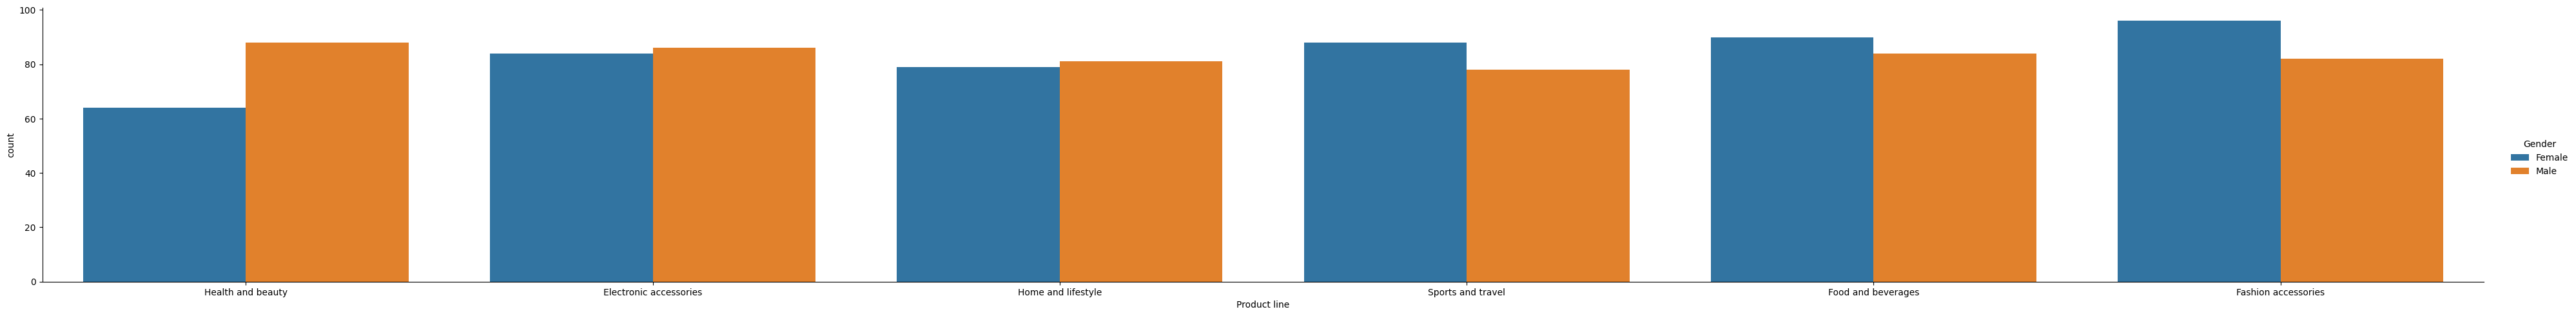

In [8]:
sns.catplot(data=data,kind='count',x='Product line',hue='Gender',aspect=11.7/1.5)

In [16]:
# Get unique values of column1
gender_data = data.groupby(['Gender','Product line'])['Rating'].agg({'count', 'mean'}).reset_index()
gender_data

,Gender,Product line,count,mean
0,Female,Electronic accessories,84,6.786905
1,Female,Fashion accessories,96,7.120833
2,Female,Food and beverages,90,7.203333
3,Female,Health and beauty,64,7.146875
4,Female,Home and lifestyle,79,6.763291
5,Female,Sports and travel,88,6.767045
6,Male,Electronic accessories,86,7.059302
7,Male,Fashion accessories,82,6.921951
8,Male,Food and beverages,84,7.016667
9,Male,Health and beauty,88,6.898864


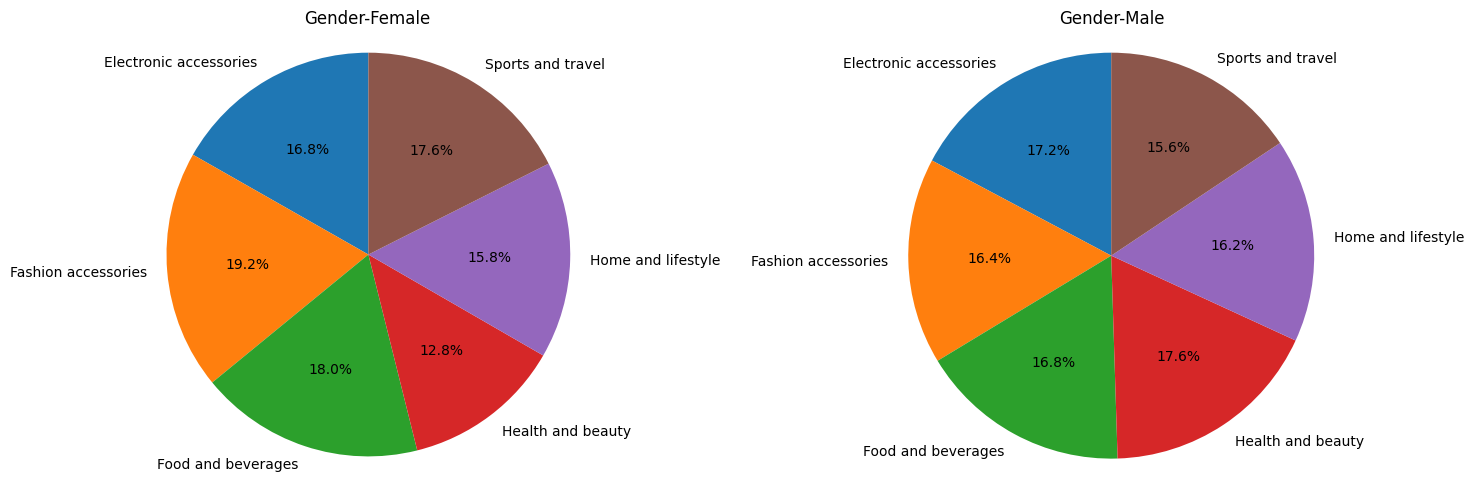

In [20]:
unique_column1_values = gender_data['Gender'].unique()
# print(unique_column1_values)
# Create subplots for each unique value in column1
fig, axes = plt.subplots(1, len(unique_column1_values), figsize=(15, 5))

# Loop through each unique value in column1 and create a pie chart
for i, value in enumerate(unique_column1_values):
    group = gender_data[gender_data['Gender'] == value]
    labels = group['Product line']
    sizes = group['count']
    ax = axes[i]
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    ax.set_title(f'Gender-{value}')

plt.tight_layout()
plt.show()

In [22]:
gross_margin = data.groupby("Product line")["gross margin percentage"].agg({'mean'}).reset_index()
gross_margin

,Product line,mean
0,Electronic accessories,4.761905
1,Fashion accessories,4.761905
2,Food and beverages,4.761905
3,Health and beauty,4.761905
4,Home and lifestyle,4.761905
5,Sports and travel,4.761905


In [27]:
product_count = data.groupby("Product line")["Quantity"].agg(pd.Series.mode).reset_index()
product_count

,Product line,0
0,Electronic accessories,10
1,Fashion accessories,1
2,Food and beverages,3
3,Health and beauty,7
4,Home and lifestyle,4
5,Sports and travel,"[7, 10]"


In [29]:
# Cross tabulation between Gender and Product type
CrosstabResult=pd.crosstab(index=data['Gender'],columns=data["Product line"])
print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

Product line  Electronic accessories  Fashion accessories  Food and beverages  \
Gender                                                                          
Female                            84                   96                  90   
Male                              86                   82                  84   

Product line  Health and beauty  Home and lifestyle  Sports and travel  
Gender                                                                  
Female                       64                  79                 88  
Male                         88                  81                 78  
The P-Value of the ChiSq Test is: 0.33188385805539106


In [43]:
category_groups = ['gross margin percentage','gross income'] # Categorical variable

f_statistic, p_value = stats.f_oneway(*[data[group] for group in category_groups])

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Check for statistical significance
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between categories.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between categories.")

F-statistic: 822.2709509938983
p-value: 9.39820593405928e-152
Reject the null hypothesis. There is a significant difference between categories.
